# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [2]:
import numpy as np

def apply_svd_custom(X_train, X_test, n_components):
    # Center the data by subtracting the mean
    X_mean = np.mean(X_train, axis=0)
    X_train_centered = X_train - X_mean
    X_test_centered = X_test - X_mean
    
    # Perform SVD on the training data
    U, S, Vt = np.linalg.svd(X_train_centered, full_matrices=False)
    
    # Reduce dimensions using the top 'n_components' singular values/vectors
    Vt_reduced = Vt[:n_components, :]
    
    # Transform both train and test data
    X_train_reduced = np.dot(X_train_centered, Vt_reduced.T)
    X_test_reduced = np.dot(X_test_centered, Vt_reduced.T)
    
    return X_train_reduced, X_test_reduced

## Part 3: Train Logistic Regression and Measure Performance

In [3]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [4]:
svd_components = [10, 50, 100, 200, 500, 784]  


# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")
    
    # Apply SVD
    X_train_svd, X_test_svd = apply_svd_custom(X_train, X_test, n_components)
    
    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
    
    # Store the results
    results.append((n_components, accuracy, training_time))
    
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")


Training models with different levels of SVD preprocessing...
Applying custom SVD with 10 components...
SVD components: 10, Accuracy: 0.8035, Training time: 2.1171 seconds
Applying custom SVD with 50 components...
SVD components: 50, Accuracy: 0.9080, Training time: 25.6167 seconds
Applying custom SVD with 100 components...
SVD components: 100, Accuracy: 0.9181, Training time: 87.8899 seconds
Applying custom SVD with 200 components...
SVD components: 200, Accuracy: 0.9206, Training time: 194.5766 seconds
Applying custom SVD with 500 components...
SVD components: 500, Accuracy: 0.9205, Training time: 715.5941 seconds
Applying custom SVD with 784 components...
SVD components: 784, Accuracy: 0.9207, Training time: 1197.3612 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


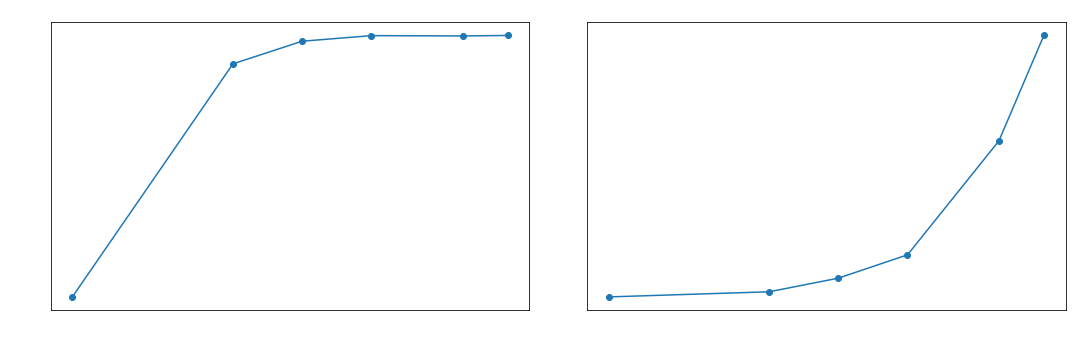

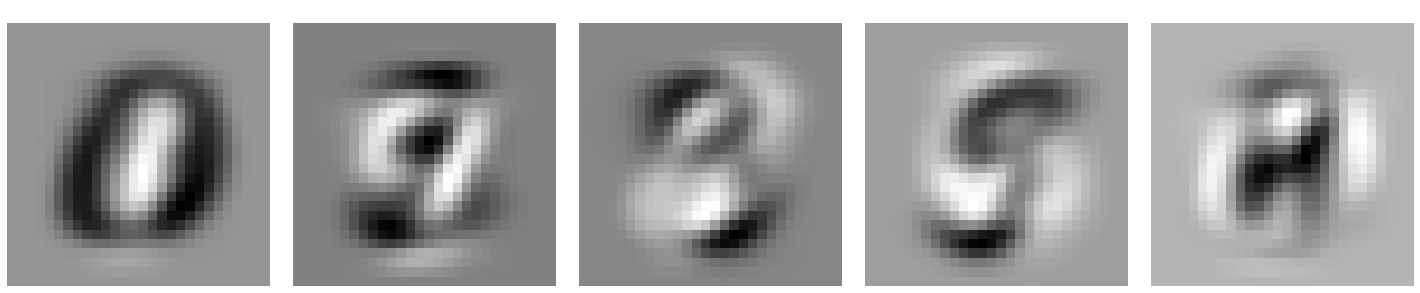

In [6]:
components = [r[0] for r in results]
accuracies = [r[1] for r in results]
times = [r[2] for r in results]

# Set the default text color to white for all plot elements
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# accuracy vs number of components
ax1.plot(components, accuracies, marker='o')
ax1.set_xscale('log')
ax1.set_xlabel('Number of SVD Components')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy vs Number of SVD Components')

# training time vs number of components
ax2.plot(components, times, marker='o')
ax2.set_xscale('log')
ax2.set_xlabel('Number of SVD Components')
ax2.set_ylabel('Training Time (seconds)')
ax2.set_title('Training Time vs Number of SVD Components')

plt.tight_layout()
plt.show()

# top 5 singular vectors
def plot_singular_vectors(X_train):
    X_train_mean = np.mean(X_train, axis=0)
    X_train_centered = X_train - X_train_mean
    cov_matrix = np.dot(X_train_centered.T, X_train_centered) / (X_train_centered.shape[0] - 1)

    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    idx = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, idx]
    top_5_vectors = eigenvectors[:, :5]

    fig, axes = plt.subplots(1, 5, figsize=(20, 4))
    for i in range(5):
        vector = top_5_vectors[:, i].reshape(28, 28)
        axes[i].imshow(vector, cmap='gray')
        axes[i].axis('off')
        axes[i].set_title(f"Singular Vector {i+1}")
    
    plt.tight_layout()
    plt.show()

plot_singular_vectors(X_train)

## Part 6: Analyze / Conclusion 

YOUR ANSWER: 

The optimal number of SVD components for this task is around 200, as accuracy significantly improves up to this point and then plateaus, while training time increases exponentially beyond it. Using fewer components provides almost the same accuracy with much lower computation costs. Therefore, applying around 200 components offers the best trade-off between accuracy and efficiency. The singular vectors indicate that the first few components capture most of the essential features in the MNIST dataset, making dimensionality reduction highly effective for this problem.






